### GMM 을 이용한 iris dataset 클러스터링

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

#### clustering 시각화 함수 정의
* clusterobj : 사이킷런의 clustering object
* dataframe : 피처 데이터 세트와 label 값을 가진 DataFrame
* label_name : DataFrame내의 clustering 결과 label 컬럼명
* iscenter : 사이킷런 cluster object가 중심점(centroid)를 제공하면 True 아니면 False
* ftr1 : 2차원 시각화 x축 기준 피처
* ftr2 : 2차원 시각화 y축 기준 피처

In [2]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, ftr1, ftr2, label_name):
    
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster[ftr1], y=label_cluster[ftr2], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper left'
    
    plt.legend(loc=legend_loc)
    plt.show()

#### iris 데이터 로드

In [3]:
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

#### GMM(Gaussian Mixture Model) 객체 생성 및 clustering 수행
* n_components : gaussian mixture의 모델의 총 개수
* Gaussian Mixture로 clustering을 수행하고 결과 확인

In [4]:
gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인. 
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


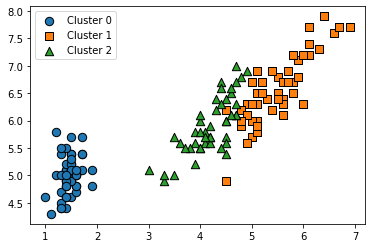

In [6]:
visualize_cluster_plot(gmm, irisDF, 'petal_length', 'sepal_length', 'gmm_cluster')